# Which City In Pittsburgh has the least Police arrests


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
arrests_df = pd.read_csv('policearrest.csv')
print('Preview of dataset:')
arrests_df.head(10)

Preview of dataset:


,_id,Template,Case_Number,ArrestPerson_ID,Arrest_Date,Arrest_Year,Arrest_Month,Arrest_Time,Type,ArrestPerson_Age,...,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,Zone,Tract,Neighborhood,ArrestCharge_Felony_Misdemeanor_Description,XCOORD,YCOORD,Block_Address
0,1,Adult Arrest-On View,PGHP25000026,b09e1066-c355-cc1b-218c-08dd2a4354ea,2025-01-01,2025.0,Jan,04:04,On-View Arrest (apprehension without a warrant...,21.0,...,Group B,B,18 5503 A1* Disorderly Conduct-Fighting/Threat...,Zone 3,1702.0,South Side Flats,MISDEMEANOR - M3,-79.9824,40.4288,"1600 Block of E Carson Street Pittsburgh, PA"
1,2,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Society,A,18 6106 A1 Firearms Act-Carrying Firearm W/O L...,Zone 3,1702.0,South Side Flats,FELONY - F3,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
2,3,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A2II Illegal Park W/I 15 Feet of Fire ...,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
3,4,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A3II Illegal Park Where Official Signs...,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
4,5,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A1III Illegal Park In Intersection,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
5,6,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Society,A,18 6106 A1 Firearms Act-Carrying Firearm W/O L...,Zone 3,1702.0,South Side Flats,FELONY - F3,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
6,7,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Society,A,35 780-113 A16 CSDDCA-Possession of a Controll...,Zone 3,1702.0,South Side Flats,MISDEMEANOR,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
7,8,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Property,A,18 3925 A Receiving Stolen Property - Item Tak...,Zone 3,1702.0,South Side Flats,FELONY - F2,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
8,9,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Society,A,35 780-113 A32 CSDDCA-Use/Possession Drug Para...,Zone 3,1702.0,South Side Flats,MISDEMEANOR,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
9,10,Adult Arrest-On View,PGHP24193437,e949b512-2f12-c48e-dc3b-08dd2a317a63,2025-01-01,2025.0,Jan,01:56,On-View Arrest (apprehension without a warrant...,22.0,...,Group B,B,18 5503 A1 Disorderly Conduct-Fighting/Threate...,Zone 3,2904.0,Carrick,INFRACTION - S,-79.9812,40.3860,"2500 Block of Edgar St. Pittsburgh, PA"


In the original dataset all crime was included, of course, all crime is not exactly violent.
I'm sure most would rather hear about shoplifting arrests than murders and homocides.
In order to accommadate, we decided to only evaluate violent crimes which include:
Assault Offenses, robbery, Homocide offenses, Kidnapping/Abduction, and sex offense.

In [6]:
arrests_df = arrests_df.dropna(subset=['Neighborhood'])
violent_crimes = [
    "Assault Offenses",
    "Robbery",
    "Homicide Offenses",
    "Kidnapping/Abduction",
    "Sex Offenses",
    "Arson"
]

violent_df = arrests_df[arrests_df['NIBRS_Offense_Category'].isin(violent_crimes)]
arrests_df['Neighborhood'] = arrests_df['Neighborhood'].str.strip().str.title()
violent_df.head()

,_id,Template,Case_Number,ArrestPerson_ID,Arrest_Date,Arrest_Year,Arrest_Month,Arrest_Time,Type,ArrestPerson_Age,...,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,Zone,Tract,Neighborhood,ArrestCharge_Felony_Misdemeanor_Description,XCOORD,YCOORD,Block_Address
10,11,Adult Arrest-On View,PGHP24193437,e949b512-2f12-c48e-dc3b-08dd2a317a63,2025-01-01,2025.0,Jan,01:56,On-View Arrest (apprehension without a warrant...,22.0,...,Person,A,18 5104 Resisting Arrest,Zone 3,2904.0,Carrick,MISDEMEANOR - M2,-79.9812,40.386,"2500 Block of Edgar St. Pittsburgh, PA"
11,12,Adult Arrest-On View,PGHP24193437,e949b512-2f12-c48e-dc3b-08dd2a317a63,2025-01-01,2025.0,Jan,01:56,On-View Arrest (apprehension without a warrant...,22.0,...,Person,A,18 2702 A3 Aggravated Assault-Injury To Police...,Zone 3,2904.0,Carrick,FELONY - F2,-79.9812,40.386,"2500 Block of Edgar St. Pittsburgh, PA"
13,14,Adult Arrest-On View,PGHP25000021,e8087412-48b6-c2f7-f546-08dd2a3a91ae,2025-01-01,2025.0,Jan,03:01,On-View Arrest (apprehension without a warrant...,41.0,...,Person,A,18 2701 A1 Simple Assault-General,Zone 3,1921.0,Southshore,MISDEMEANOR - M2,-80.0070,40.435,NaN
19,20,Adult Arrest-On View,PGHP25000147,d5e69282-19d2-c5fb-b9f0-08dd2a5262a0,2025-01-01,2025.0,Jan,05:52,On-View Arrest (apprehension without a warrant...,28.0,...,Person,A,"18 2701 B1 Simple Assault - Mutual Combatants,...",Zone 5,1208.0,Larimer,MISDEMEANOR - M3,-79.9177,40.465,"0 Block of Auburn St Pittsburgh, PA"
20,21,Adult Arrest-On View,PGHP25000147,d5e69282-19d2-c5fb-b9f0-08dd2a5262a0,2025-01-01,2025.0,Jan,05:52,On-View Arrest (apprehension without a warrant...,28.0,...,Person,A,18 2702.1 A2 Assault of Law Enforcement Office...,Zone 5,1208.0,Larimer,FELONY - F3,-79.9177,40.465,"0 Block of Auburn St Pittsburgh, PA"


In [7]:
violent_counts = violent_df['Neighborhood'].value_counts().reset_index()
violent_counts.columns = ['Neighborhood', 'Violent_Arrest_Count']
violent_counts = violent_counts.sort_values(by='Violent_Arrest_Count', ascending=True)
violent_counts.head(10)

,Neighborhood,Violent_Arrest_Count
89,Swisshelm Park,1
88,Ridgemont,2
87,Saint Clair,5
86,Chartiers,7
83,East Carnegie,8
84,Allegheny West,8
85,Oakwood,8
81,Polish Hill,9
82,Friendship,9
79,Summer Hill,10


In [8]:
safest = violent_counts.iloc[0]

print("The safest neighborhood in Pittsburgh is:",
      safest['Neighborhood'],
      "with only",
      safest['Violent_Arrest_Count'],
      "police arrests recorded.")

The safest neighborhood in Pittsburgh is: Swisshelm Park with only 1 police arrests recorded.


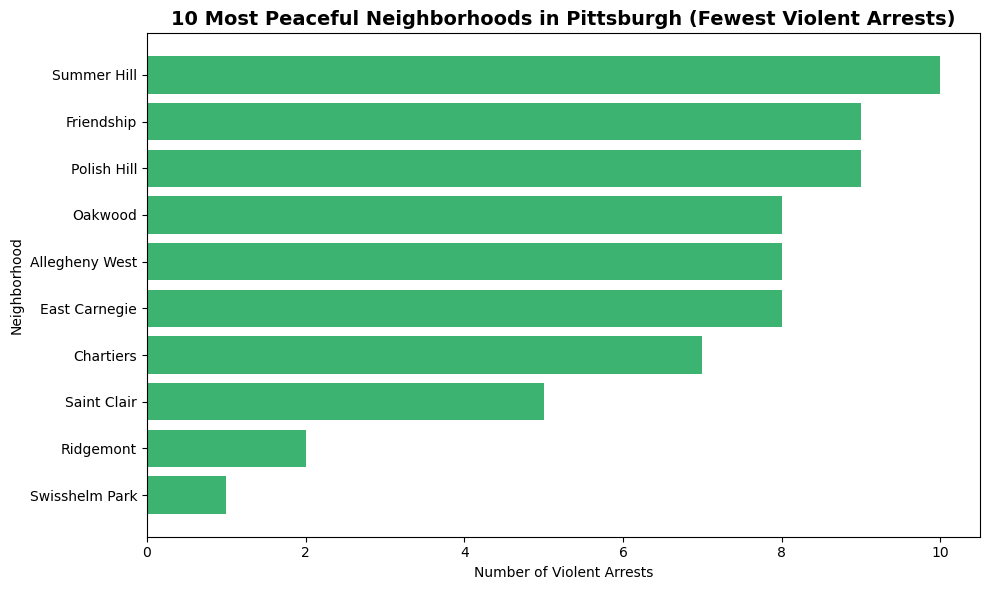

In [9]:
bottom_10 = violent_counts.head(10)

plt.figure(figsize=(10,6))
bars = plt.barh(bottom_10['Neighborhood'], bottom_10['Violent_Arrest_Count'], color='mediumseagreen')
plt.title('10 Most Peaceful Neighborhoods in Pittsburgh (Fewest Violent Arrests)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Violent Arrests')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()